<a id='GoTop'></a>
#### References:
* http://www.nyayapati.com/srao/2014/05/how-to-install-numpy-scipy-pandas-matplotlib-and-scikit-learn-on-mavericks/ 
* https://github.com/pydata/pandas-datareader 

In [2]:
!pwd

/Users/kpadhikari/Desktop/BigFls/CLAS12/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks


In [2]:
###!/usr/bin/env python3
"""
Created on Tue Sep  17 00:00:00 2019

@author: KPAdhikari
"""
from __future__ import print_function
import os.path
from os import path
import xlsxwriter
import json, math
import sys, os, fnmatch, platform

## Contents/Quick Links
* [pandas_datareader](#pandas_datareader)
* [Handling or Dealing with NANs in a Dataframe](#HandlingNansInDataframe)
* [Drop one or more dataframe columns](#DropAColumn)
* [Making a Histogram](#MakingAHistogram)
* [Check if a column exists in a dataframe](#CheckIfAColumnExistsInADataframe)
* [Apply function using information from 2 or more columns](#ApplyFunctionUsingInfoFrom2orMoreColumns)
    * [Apply a function to a column and create a new column with the function output](#ApplyAFunctionToAColumn).
* [Plotting directly from dataframes](#PlottingDirectlyFromDataframe)
    * [Plot a column with only some selected values (using Cuts or Conditions)](#PlotAColumnWithCutsOrConditions)
* [Multiply or Rescale Columns and Plot](#RescaleAndPlotColumns)
* [Operating on data from multiple columns of dataframe and creating new columns from the results](#OperatingOnMultipleColumns) or Apply function using information from 2 or more columns
* [Fit with Data in a pandas DataFrame](#FitWithDataInAPandasDataFrame)
* [Pandas dataframe.groupby()](#groupbyMethod)

<img src="http://pandas.pydata.org/_static/pandas_logo.png" style="width:400px;height:80px;">
# <font color='red'>Pandas Tutorial On Stock Price Analysis</font> 

*This tutorial will cover how to retrieve stock price from google finance using pandas data reader. The analysis of stock is done by plotting its high, low, close, volumne values in table and a chart. Charts are of two types,*

1. Line Chart
2. Bar Chart

If you don't know what is stock then first **watch this video to gain understanding on fundamentals of stocks and investing**,

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/XRO6lEu9-5w" frameborder="0" allowfullscreen></iframe>

[GoTop](#GoTop) <a id='pandas_datareader'></a>
## pandas_datareader

In [4]:
import pandas_datareader as pdr
pdr.get_data_yahoo('AAPL')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,26.054865
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,25.758488
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,26.121826
2010-01-14,30.065714,29.860001,30.015715,29.918571,108223500.0,25.970547


In [5]:
import pandas as pd  #Not essential here, just for try
import numpy as np   #Not essential here, just for try
#import pandas.io.data as web
import pandas_datareader as web  #https://github.com/pydata/pandas-datareader
#from pandas_datareader import data as web

#df = web.DataReader('AAPL', 'google', '2016/1/1', '2017/1/1')
'''
ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues
'''
df = web.DataReader('AAPL', '2016/1/1')
df.head()

NotImplementedError: data_source='2016/1/1' is not implemented

In [ ]:
%matplotlib inline
df.plot(y="Close", color="Green")

In [ ]:
df.plot.bar(y="Volume")

In [ ]:
%system ls

[GoTop](#GoTop) <a id='WeightedAndUnweightedSumsOfDataFrames'></a>
## Weighted And Unweighted Sums Of Dataframes

In [ ]:
# https://stackoverflow.com/questions/45352909/pandas-indexingerror-unalignable-boolean-series-provided-as-indexer
import pandas as pd
import numpy as np

dfw1 = pd.DataFrame({'id':[1,2,3,4,5], 'a':[4.3,2.0,6.1,35,8.2], 'b':[3,0.6,2.,8,9], 'c':[5,2.6,4,18,0.9] })
dfw1.head()

In [ ]:
dfw2 = pd.DataFrame({'id':[1,2,3,4,5], 'a':[3.3,2.2,7.1,20,4.2], 'b':[8,1.6,2.4,8.3,1.9], 'c':[5,2.6,4,18,0.9] })
dfw2.head()

In [ ]:
wt = [2.0, 3.0]
print(wt)

In [ ]:
# Creating two df-arrays, one of the unweighted dfs and another of the weighted dfs
dfArr = [dfw1]
dfWtArr = [wt[0]*dfw1]
dfArr.append(dfw2)
dfWtArr.append(wt[1]*dfw2)

# Now making weighted and unweighted sums out of the arrays
dfSimpleSum = pd.concat(dfArr, sort=True).groupby(level=0).sum()
dfWeightedSum = pd.concat(dfWtArr, sort=True).groupby(level=0).sum()

#Now keeping original 'id' in a new column 'idOrg'
dfSimpleSum['idOrg'] = dfw1['id']
dfWeightedSum['idOrg'] = dfw1['id']

dfSimpleSum.head()

In [ ]:
dfWeightedSum.head()

[GoTop](#GoTop) <a id='HandlingNansInDataframe'></a>
## Handling or Dealing with NANs in a Dataframe

In [ ]:
# https://stackoverflow.com/questions/45352909/pandas-indexingerror-unalignable-boolean-series-provided-as-indexer
import pandas as pd
import numpy as np

dfn = pd.DataFrame({'a':[1,3,np.nan,5.2, 1.7, np.nan], 'b':[4.3,np.nan,6.1, 35, 8.2, np.nan], 
                    'c':[np.nan, 2.6, 4, 8,9,np.nan], 'd':[1,2,np.nan,9, 7, np.nan], 
                    'e':[4.4,np.nan,6.2, np.nan,7.8, np.nan], 'f':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]})
dfn.head()
#df = df[df.notnull().any(axis = 0)]
#print df

In [ ]:
print (dfn.notnull().any(axis = 0))

In [6]:
dfn = dfn.loc[:, dfn.notnull().any(axis = 0)]
print (dfn)

NameError: name 'dfn' is not defined

In [7]:
listA = dfn.loc[(dfn['c'] > 0.0) & (dfn['c'] > 2.0), 'a'].tolist()
print(listA)
listAn = dfn.loc[dfn['a'].notnull() & (dfn['c'] > 0.0) & (dfn['c'] > 2.0), 'a'].tolist()
print(listAn)
listDn = dfn.loc[dfn['a'].notnull() & (dfn['c'] > 0.0) & (dfn['c'] > 2.0), 'd'].tolist()
print(listDn)
listEn = dfn.loc[dfn['a'].notnull() & (dfn['c'] > 0.0) & (dfn['c'] > 2.0), 'e'].tolist()
print(listEn)

NameError: name 'dfn' is not defined

[GoTop](#GoTop) <a id='DropAColumn'></a>
## Drop one or more dataframe columns
Ref: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [25]:
df4Drop = pd.DataFrame({'id':[1,2,3,4,5], 'a':[3.3,2.2,7.1,20,4.2], 'b':[8,1.6,2.4,8.3,1.9], 'c':[5,2.6,4,18,0.9] })
df4Drop.head()

,id,a,b,c
0,1,3.3,8.0,5.0
1,2,2.2,1.6,2.6
2,3,7.1,2.4,4.0
3,4,20.0,8.3,18.0
4,5,4.2,1.9,0.9


In [20]:
dfDropped = df4Drop.drop(['a', 'c'], axis = 1)
dfDropped.head()

,id,b
0,1,8.0
1,2,1.6
2,3,2.4
3,4,8.3
4,5,1.9


[GoTop](#GoTop) <a id='MakingAHistogram'></a>
## Making a histogram
Ref: https://www.w3resource.com/pandas/dataframe/dataframe-plot-hist.php 

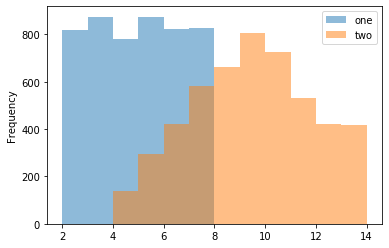

In [22]:

# Ref: https://www.w3resource.com/pandas/dataframe/dataframe-plot-hist.php 
df = pd.DataFrame(
    np.random.randint(2, 8, 5000),
    columns = ['one'])
df['two'] = df['one'] + np.random.randint(2, 8, 5000)
ax = df.plot.hist(bins=12, alpha=0.5)



Ref: https://stackoverflow.com/questions/50540256/python-plotting-a-histogram-from-dataframe-column

By all accounts, filter is lucky to be part of the standard library. IIUC, you just want to filter your dataframe to plot a histogram of values > 0. Pandas has its own syntax for that:

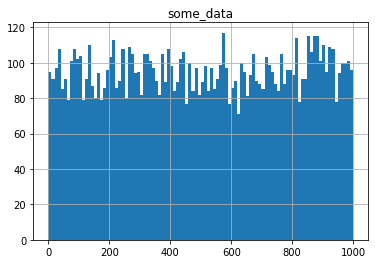

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

data = np.random.randint(-50, 1000, 10000)

df = pd.DataFrame({'some_data': data})

df[df['some_data'] >= 0].hist(bins=100)
plt.show()

Note that this will run much faster than python builtins could ever hope to (it doesn't make much difference in my trivial example, but it will with bigger datasets). It's important to use pandas methods with dataframes wherever possible because, in many cases, the calculation will be vectorized and run in highly optimised C/C++ code.

Ref: https://stackoverflow.com/questions/25447208/column-histograms-in-pandas

This presentation doesn't rescale, it horizontally translates the individual histograms so that they don't overlap and then labels the X-axis with the column names (at median values) rather than represent scale. 

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7')]

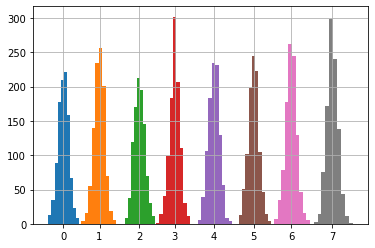

In [23]:
from pandas import DataFrame
from numpy.random import randn
sample = 1000
df = DataFrame(randn(sample, 8))
accum1 = 0
accum2 = 0
spacer = 1
MyTics = []    
for colname in df.columns:
    TransformedValues = df[colname] - accum1 + accum2
    MyTics.extend([TransformedValues.median()])
    axs = (TransformedValues).hist()
    accum1 += df[colname].min()  
    accum2 += df[colname].max() + spacer    
axs.set_xticks(MyTics)
axs.set_xticklabels(df.columns)   

[GoTop](#GoTop) <a id='CheckIfAColumnExistsInADataframe'></a>
## Check if a column exists in a dataframe

https://stackoverflow.com/questions/24870306/how-to-check-if-a-column-exists-in-pandas

This will work:
```py
if 'A' in df:
```
But for clarity, I'd probably write it as:
```py
if 'A' in df.columns:
```

In [33]:
colName = 'b'#'a'#'KP'
if colName in dfn.columns:
    print("'{}' column exists".format(colName))
else:
    print("'{}' column doesn't exist".format(colName))

'b' column exists


[GoTop](#GoTop) <a id='ApplyFunctionUsingInfoFrom2orMoreColumns'></a>
## Apply function using information from 2 or more columns
**In other words, apply a single function that takes as parameters elements from 2 (or more) columns.**

Ref: http://queirozf.com/entries/pandas-dataframe-examples-column-operations#apply-function-using-information-from-2-or-more-columns

Use 
```py 
df.apply(lambda row: ... , axis=1) 
```

Example: Find out if column word is in column text: 

In [1]:
import pandas as pd

df = pd.DataFrame({
    'text': ['foo bar','bar baz','baz quux','foo quux'],
    'word': ['foo','foo','bar','foo']
})

df.head()

,text,word
0,foo bar,foo
1,bar baz,foo
2,baz quux,bar
3,foo quux,foo


In [14]:
df['word_is_in_text'] = df[['text','word']].apply(lambda row: row['word'] in row['text'], axis=1)
df.head()

,text,word,word_is_in_text
0,foo bar,foo,True
1,bar baz,foo,False
2,baz quux,bar,False
3,foo quux,foo,True


#### Let me try similar and more on above dataframe 'dfn'.

(Additional ref: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o)

In [40]:
dfn.head()

,a,b,c,d,e,a+b,c+d,de,b+e,b*e,b/e
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN,5.4,8.7,18.92,0.977273
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN,NaN,12.3,37.82,0.983871
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0,NaN,NaN,NaN,NaN
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0,14.8,16.0,63.96,1.051282


In [39]:
def addTwoColumns(row):
    if (row['a']==np.nan) | (row['b']==np.nan):
        return np.nan
    else:
        return float(row['a']) + float(row['b'])
    
dfn['a+b'] = dfn[['a','b']].apply(lambda row: addTwoColumns(row), axis=1)
dfn.head()

,a,b,c,d,e,a+b,c+d,de,b+e,b*e,b/e
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN,5.4,8.7,18.92,0.977273
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN,NaN,12.3,37.82,0.983871
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0,NaN,NaN,NaN,NaN
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0,14.8,16.0,63.96,1.051282


In [37]:
def addAnyTwoColumns(row, colNm1, colNm2):
    if (row[colNm1]==np.nan) | (row[colNm2]==np.nan):
        return np.nan
    else:
        return float(row[colNm1]) + float(row[colNm2])

dfn['c+d'] = dfn[['c','d']].apply(lambda row: addAnyTwoColumns(row, 'c', 'd'), axis=1)
dfn.head()

,a,b,c,d,e,a+b,c+d,de,b+e,b*e,b/e
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN,5.4,8.7,18.92,0.977273
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN,NaN,12.3,37.82,0.983871
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0,NaN,NaN,NaN,NaN
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0,14.8,16.0,63.96,1.051282


In [38]:
dfn['d'+'e'] = dfn[['d','e']].apply(lambda row: addAnyTwoColumns(row, 'd', 'e'), axis=1)
dfn.head()

,a,b,c,d,e,a+b,c+d,de,b+e,b*e,b/e
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN,5.4,8.7,18.92,0.977273
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN,NaN,12.3,37.82,0.983871
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0,NaN,NaN,NaN,NaN
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0,14.8,16.0,63.96,1.051282


[GoTop](#GoTop) <a id='ApplyAFunctionToAColumn'></a>
## Apply a function to a column and create a new column with the function output


In [43]:
def myFunc(arg, par1, par2):
    return arg*3 + par1*4.0 + par2*5;

def myFunc4DF(row, colName):
    if (row[colName]==np.nan):
        return np.nan
    else:
        return float(myFunc(row[colName], 2.0, 3.0))

dfFunc = dfn
dfFunc['myFunc(e)'] = dfFunc.apply(lambda row: myFunc4DF(row, 'e'), axis=1)
dfFunc.head()

,a,b,c,d,e,a+b,c+d,de,b+e,b*e,b/e,myFunc(e)
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN,5.4,8.7,18.92,0.977273,36.2
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN,NaN,12.3,37.82,0.983871,41.6
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0,NaN,NaN,NaN,NaN,NaN
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0,14.8,16.0,63.96,1.051282,46.4


[GoTop](#GoTop) <a id='PlottingDirectlyFromDataframe'></a>
## Plotting directly from dataframes
(Following two cells are copied from http://localhost:8888/notebooks/KpInstalls/Geant4/ExamplesBld/HadronTherapyKp2/Test_Outputs_of_thisSimulation_HadrontherapyKp2.ipynb#)

In [19]:
import pandas as pd
# https://stackoverflow.com/questions/44729498/plotting-data-from-multiple-pandas-data-frames-in-one-plot
import numpy as np
#https://stackoverflow.com/questions/45467320/plot-multiple-pandas-dataframes-in-one-graph
import matplotlib.pyplot as plt 

dataFile = "/Users/kpadhikari/KpInstalls/Geant4/ExamplesBld/HadronTherapyKp2/Tmp/DoseV1.out"
# https://github.com/jupyter/notebook/issues/3805 
#data = pd.read_csv('output_list.txt', header = None)
#pd.read_csv('file.csv', delimiter=' ')
#pd.read_csv('addresses.csv')
#pd.read_csv("whitespace.csv", header=None, delimiter=r"\s+")
dataframe = pd.read_csv(dataFile,delim_whitespace=True) # works
#data = pd.read_csv('./TmpBkp_defMac/Dose.out', sep=" ", header=None) # doesn't work
#data = pd.read_csv('./TmpBkp_defMac/Dose.out', header=None, delimiter=r"\s+")  #works
df = dataframe
#print(dataframe)  #works (didn't want to print too much showing all rows)
df.head()

,i,j,k,Dose(Gy)
0,0,0,0,6.054910e-08
1,1,0,0,6.030820e-08
2,2,0,0,6.154180e-08
3,3,0,0,5.987870e-08
4,4,0,0,6.031540e-08


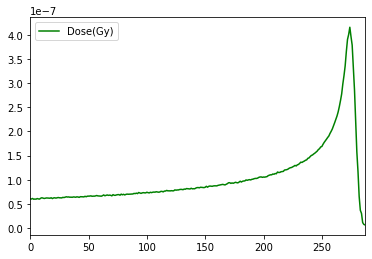

In [20]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
%matplotlib inline
df.plot(y='Dose(Gy)', color="Green")

[GoTop](#GoTop)<a id='PlotAColumnWithCutsOrConditions'></a>
### Plot a column with only some selected values (using Cuts or Conditions)

Ref: https://stackoverflow.com/questions/43191783/create-a-conditional-plot-python

**Question:** I want to plot just values which are less or equal a certain number (let's say 15). I can find these values in one column of my dataframe and if these values aren't less or equal 15, I don't want to plot them.

**Answer1:** (kp: Let's first look at the code that makes a dataframe and makes a plot wihtout any condition).

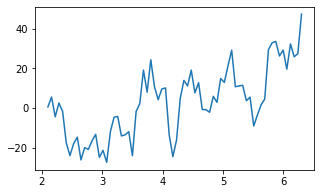

In [6]:
import numpy as np; np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = 5,3

x = np.linspace(2.1,6.3,num=70)
y = np.cumsum(np.random.normal(size=len(x))*10.)
df = pd.DataFrame({"x":x, "y":y})

plt.plot(df.x,df.y)

plt.show()

Now you have several options:
#### 1. Limit the view

You can simply limit the view of the plot such that its y scale only goes up to 15. This is done via

(-30, 15)

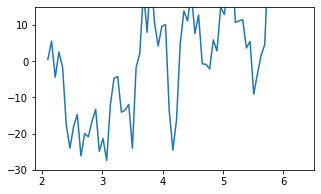

In [7]:
plt.plot(df.x,df.y)

plt.ylim(-30,15)

In [17]:
df.head(2)

,x,y
0,2.10000,0.505617
1,2.16087,5.505130


#### 2. Filter the dataframe
(kp: Some related references: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html, https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/)

You can filter the dataframe by a condition. This means that in the resulting dataframe only those rows where the condition is met are present.

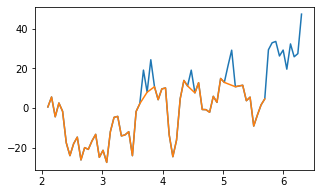

In [8]:
df2 = df[df.y <= 15]

plt.plot(df.x,df.y, label="original")
plt.plot(df2.x,df2.y, label="filtered to y <= 15")

As can be seen, the values above 15 are not in the filtered curve. However, it also looks like the new curve beeing continuous, which may be confusing depending on what graph is desired.

#### 3. Setting all values above 15 to nan

Values in a dataset which are nan (not a number) are not plotted. This can be used, by setting all values above 15 to nan. 

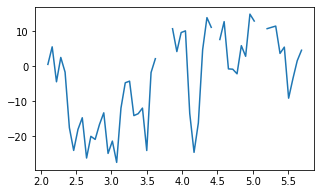

In [9]:
df2 = df.copy()
df2[df2.y > 15] = np.nan

plt.plot(df2.x,df2.y, label="y > 15 set to nan")

#### Appendix: Using two different conditions
You can use several conditions by combining them with logical operators like & ("and") or | ("or"). So setting all values which are either above 15 or below -15 to nan, you'd do

In [10]:
df2[(df2.y > 15) | (df2.y < -15)] = np.nan

[GoTop](#GoTop) <a id='RescaleAndPlotColumns'></a>
## Multiply or Rescale Columns and Plot

In [21]:
df = pd.DataFrame({"col1": [1, 2, 3], 'col2': [1, 4, 9]})
df.head()

,col1,col2
0,1,1
1,2,4
2,3,9


In [22]:
# Add a new column that's a multiple/product of a column and a number.
df['col2Scaled'] = 0.5*df['col2']
df.head()

,col1,col2,col2Scaled
0,1,1,0.5
1,2,4,2.0
2,3,9,4.5


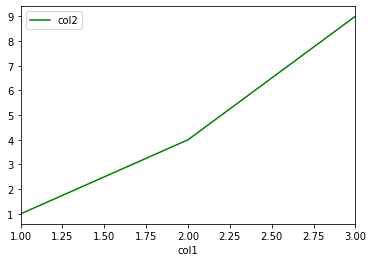

In [23]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

df.plot(x='col1', y='col2', color="Green")

[GoTop](#GoTop) <a id='OperatingOnMultipleColumns'></a>
## Operating on data from multiple columns of dataframe and creating new columns from the results

**In other words, apply a single function that takes as parameters elements from 2 (or more) columns.**

Ref: http://queirozf.com/entries/pandas-dataframe-examples-column-operations#apply-function-using-information-from-2-or-more-columns

Use 
```py 
df.apply(lambda row: ... , axis=1) 
```

(For more info about **Lambda functions**, look at my notebook http://localhost:8888/notebooks/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks/Lambda_Functions_In_Python.ipynb. Particularly, note that **"A lambda function is a small anonymous function. It can take any number of arguments, but can only have one expression.
Syntax `lambda arguments:  expression` The expression is executed and the result is returned."**

Example: Find out if column word is in column text: 

In [24]:
import pandas as pd

df = pd.DataFrame({
    'text': ['foo bar','bar baz','baz quux','foo quux'],
    'word': ['foo','foo','bar','foo']
})

df.head()

,text,word
0,foo bar,foo
1,bar baz,foo
2,baz quux,bar
3,foo quux,foo


In [25]:
#df['word_is_in_text'] = df[['text','word']].apply(lambda row: row['word'] in row['text'], axis=1)
df['word_is_in_text'] = df.apply(lambda row: row['word'] in row['text'], axis=1) #Both are equivalent
df.head()

,text,word,word_is_in_text
0,foo bar,foo,True
1,bar baz,foo,False
2,baz quux,bar,False
3,foo quux,foo,True


To understand above code particularly that inside apply() method, look at the syntax of the lambda function `lambda arg(s): expression` where arg(s) is one or more input parameters/arguments, and expression is a single expression and not more which is returned by the lambda function.

In the above code, the lambda function at a time takes in a row is input argument and the expression returns either True or False based on whether the value of `row['word']` column in the given row is contained in the value of `row['text']` in the same row and that boolean result is assigned as the value of the newly created column `['word_is_in_text']` in the same row.

Next, look at the following code where statements such as `'text1' in 'text2'` return boolean values depending on whether text1 is a subset/part of text2 or not (i.e. whether text1 is contained in text2 or not as follows):

In [26]:
aa = 'Krishna' in 'Krishna P. Adhikari'
aa

True

In [27]:
bb = 'Krishna' in 'Bharat P. Adhikari'
bb

False

In [28]:
df[['text','word']].head(3)

,text,word
0,foo bar,foo
1,bar baz,foo
2,baz quux,bar


#### Let me try similar and more on above dataframe 'dfn'.

(Additional ref: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o)

In [29]:
dfn.head()

,a,b,c,d,e
0,1.0,4.3,NaN,1.0,4.4
1,3.0,NaN,2.6,2.0,NaN
2,NaN,6.1,4.0,NaN,6.2
3,5.2,35.0,8.0,9.0,NaN
4,1.7,8.2,9.0,7.0,7.8


In [30]:
def addTwoColumns(row):
    if (row['a']==np.nan) | (row['b']==np.nan):
        return np.nan
    else:
        return float(row['a']) + float(row['b'])
    
dfn['a+b'] = dfn[['a','b']].apply(lambda row: addTwoColumns(row), axis=1)
dfn.head()

,a,b,c,d,e,a+b
0,1.0,4.3,NaN,1.0,4.4,5.3
1,3.0,NaN,2.6,2.0,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN
3,5.2,35.0,8.0,9.0,NaN,40.2
4,1.7,8.2,9.0,7.0,7.8,9.9


In [31]:
def addAnyTwoColumns(row, colNm1, colNm2):
    if (row[colNm1]==np.nan) | (row[colNm2]==np.nan):
        return np.nan
    else:
        return float(row[colNm1]) + float(row[colNm2])

dfn['c+d'] = dfn[['c','d']].apply(lambda row: addAnyTwoColumns(row, 'c', 'd'), axis=1)
dfn.head()

,a,b,c,d,e,a+b,c+d
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0


In [32]:
dfn['d'+'+e'] = dfn[['d','e']].apply(lambda row: addAnyTwoColumns(row, 'd', 'e'), axis=1)
dfn.head()

,a,b,c,d,e,a+b,c+d,d+e
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN,5.4
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN,NaN
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0,NaN
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0,14.8


#### We don't even need external functions simply to add or multiply columns together.

In [29]:
dfn['b'+'+e'] = dfn.apply(lambda row: row['b']+row['e'], axis=1)
dfn['b*e'] = dfn.apply(lambda row: row['b']*row['e'], axis=1)
dfn['b/e'] = dfn.apply(lambda row: row['b']/row['e'], axis=1)
dfn.head()

,a,b,c,d,e,a+b,c+d,de,b+e,b*e,b/e
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN,5.4,8.7,18.92,0.977273
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN,NaN,12.3,37.82,0.983871
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0,NaN,NaN,NaN,NaN
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0,14.8,16.0,63.96,1.051282


**See (here http://localhost:8888/notebooks/GitProj/KPAdhikari/EVMS_stuff/EVMS-stuff-py3.ipynb) how I used this idea to to read a big excel file with several columns related with proton-therapy data and then directly used data from the existing columns on a function to calculate new estimates for RBE, and its correlated and uncorrelated error and then create corresponding new columns (note that the correlation terms being negative, the correlated error is smaller in size than uncorrelated ones)**. Not to lose sight, I am copying the corresponding cells below:

### First creating a dataframe from the data table (in Excel file format).

In [25]:
#https://www.journaldev.com/33306/pandas-read_excel-reading-excel-file-in-python 
import pandas

dataFile = '/Users/kpadhikari/Desktop/BigFls/CLAS12/GitProj/KPAdhikari/EVMS_stuff/globalRBE_paperRBEaddedByHandJan2020LetGt0.xlsx'
#excel_data_df = pandas.read_excel('records.xlsx', sheet_name='Employees')
dfLetGt0 = pandas.read_excel(dataFile) #, sheet_name='Employees')

# print whole sheet data
#print(df)
dfLetGt0.head()

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,alpha_err,beta,beta_X,beta_X_err,beta_err,author,year,RBE
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,0.079,0.101,0.10,0.034,0.062,Marshall,2016,1.024040
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,0.133,0.096,0.10,0.034,0.139,Marshall,2016,1.578926
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,0.024,0.126,0.10,0.034,0.020,Marshall,2016,1.131389
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,0.022,0.156,0.10,0.034,0.019,Marshall,2016,1.253248
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,0.016,0.051,0.05,0.007,0.003,Wouters,2015,1.055195


### Next defining the multi-arg functions to be used on several columns.
I am defining 3 different functions, one for RBE, another for RBEerrUncorrelated and the third for RBEerrCorrelated.

In [40]:
#This will return RBE
# We use the following formula for RBE, 
#       RBE = f(x,y,u,v) = ((sqrt(x^2 - 4uc) - x)/(sqrt(y^2 - 4vc) - y))*(v/u)
#           where,
#          x = alpha_X,   y = alpha_P,  u = beta_X, v = beta_P and c = lnSF (with SF=0.1 usually)
#
def CalcRBE4dfCol(row): #, 'alpha_X', 'alpha', 'beta_X', 'beta'):
    if (row['alpha_X']==np.nan) | (row['alpha']==np.nan) | (row['beta_X']==np.nan) | (row['beta']==np.nan):
        return np.nan
    else:
        alphaP = float(row['alpha'])
        alphaX = float(row['alpha_X'])
        betaP = float(row['beta'])
        betaX = float(row['beta_X'])
        '''
        alphaXerr = 0.0
        alphaPerr = 0.0
        betaXerr = 0.0
        betaPerr = 0.0
        rbe = CalcRBE(alphaX, alphaP, betaX, betaP, alphaXerr, alphaPerr, betaXerr, betaPerr)
        return rbe
        '''
    
    
        lnSF = math.log(0.1) #natural log of SF = 0.1 (SF = 10%)

        sqrtNumer = math.sqrt(alphaX * alphaX - 4*betaX*lnSF)
        sqrtDenom = math.sqrt(alphaP * alphaP - 4*betaP*lnSF)
        RBEnumer = (sqrtNumer - alphaX) * betaP
        RBEdenom = (sqrtDenom - alphaP) * betaX
        if RBEdenom == 0:
            return np.nan
        else:
            RBE = RBEnumer/RBEdenom  
            return RBE

In [41]:
#This will return Uncorrelated Error on RBE and will be directly used on dataframe columns.  

# We use the following formula for RBE, 
#       RBE = f(x,y,u,v) = ((sqrt(x^2 - 4uc) - x)/(sqrt(y^2 - 4vc) - y))*(v/u)
#           where,
#          x = alpha_X,   y = alpha_P,  u = beta_X, v = beta_P and c = lnSF (with SF=0.1 usually)
#

    # Let's denote the partial dervatives of f(x,y,u,v) as dfdx, dfdy, and dfdz and the variable errors 
    #        are dx, dy, du and dv
    #     Next, let's denote dfdx*dx = Dfx, dfdy*dy = Dfy, dfdu*du = Dfu and dfdv*dv = Dfv
    #
    #
    #
    # Uncorrelated Errors of f(x,y,u,v)
    #
    #           DfUncorr = sqrt ( (dfdx * dx)^2  + (dfdy * dy)^2 + (dfdu * du)^2 + (dfdv * dv)^2 )
    #                    = sqrt (Dfx^2 + Dfy^2 + Dfu^2 + Dfv^2)
    #
    # Correlelated Error
    #
    #           DfCorr   = sqrt ( DfUnCorr^2  +  2*(Dfx*Dfy + Dfx*Dfu + Dfx*Dfv + Dfy*Dfu + Dfy*Dfv + Dfu*Dfv))
    #                             
    #
    
def CalcRBEerrUncorr4dfCol(row):
    if (row['alpha_X']==np.nan) | (row['alpha']==np.nan) | (row['beta_X']==np.nan) | (row['beta']==np.nan) | \
       (row['alpha_X_err']==np.nan) | (row['alpha_err']==np.nan) | (row['beta_X_err']==np.nan) | (row['beta_err']==np.nan):
        return np.nan
    else:
        alphaP = float(row['alpha'])
        alphaX = float(row['alpha_X'])
        betaP = float(row['beta'])
        betaX = float(row['beta_X'])
        alphaPerr = float(row['alpha_err'])
        alphaXerr = float(row['alpha_X_err'])
        betaPerr = float(row['beta_err'])
        betaXerr = float(row['beta_X_err'])
        
        lnSF = math.log(0.1) #natural log of SF = 0.1 (SF = 10%)

        sqrtNumer = math.sqrt(alphaX * alphaX - 4*betaX*lnSF)
        sqrtDenom = math.sqrt(alphaP * alphaP - 4*betaP*lnSF)
        RBEnumer = (sqrtNumer - alphaX) * betaP
        RBEdenom = (sqrtDenom - alphaP) * betaX

        if (RBEdenom == 0) | (sqrtNumer ==0) | (sqrtDenom ==0) | (betaX == 0) | (betaP == 0)  | (alphaX == 0) | (alphaP == 0):
            return np.nan
        else:
            # Now let's evaluate the uncorrelated errors
            # Let's say alpha_x = x, alpha_p = y, beta_x = u, beta_p = v, lnSF = c, RBE = f
            #  Then RBE-err = Delta f = sqrt( (df/dx)^2*Dx^2 + (df/dy)^2*Dy^2 + (df/du)^2*Du^2 + (df/dv)^2*Dv^2 )
            dfdx = ( alphaX/sqrtNumer - 1.0) * (betaP/betaX)* 1.0/(sqrtDenom - alphaP)
            dfdy = -1.0 * (betaP/betaX)* (alphaP/sqrtDenom - 1.0) * (sqrtNumer - alphaX) / (math.pow((sqrtDenom - alphaP), 2))
            dfdu = -(betaP/math.pow(betaX,2)) * (sqrtNumer - alphaX)/(sqrtDenom - alphaP) \
                   - 2*betaP*lnSF/(sqrtNumer*(sqrtDenom - alphaP))
            dfdv = (1.0/betaX)*(sqrtNumer - alphaX)/(sqrtDenom - alphaP) \
                   + (2*betaP*lnSF/betaX) * (sqrtNumer - alphaX)/(math.pow((sqrtDenom - alphaP),2)*sqrtDenom)

            Dfx = dfdx*alphaXerr
            Dfy = dfdy*alphaPerr
            Dfu = dfdu*betaXerr
            Dfv = dfdv*betaPerr
            RBEerrorUncorr = math.sqrt( math.pow(Dfx,2) + math.pow(Dfy,2) + math.pow(Dfu,2)  + math.pow(Dfv,2))
            RBEerrorCorr = math.sqrt( math.pow(RBEerrorUncorr,2) +
                                     2*(Dfx*Dfy + Dfx*Dfu + Dfx*Dfv + Dfy*Dfu + Dfy*Dfv + Dfu*Dfv))

            return RBEerrorUncorr

In [42]:
#This one returns Correlated error on RBE
def CalcRBEerrCorr4dfCol(row):
    if (row['alpha_X']==np.nan) | (row['alpha']==np.nan) | (row['beta_X']==np.nan) | (row['beta']==np.nan) | \
       (row['alpha_X_err']==np.nan) | (row['alpha_err']==np.nan) | (row['beta_X_err']==np.nan) | (row['beta_err']==np.nan):
        return np.nan
    else:
        alphaP = float(row['alpha'])
        alphaX = float(row['alpha_X'])
        betaP = float(row['beta'])
        betaX = float(row['beta_X'])
        alphaPerr = float(row['alpha_err'])
        alphaXerr = float(row['alpha_X_err'])
        betaPerr = float(row['beta_err'])
        betaXerr = float(row['beta_X_err'])
        
        lnSF = math.log(0.1) #natural log of SF = 0.1 (SF = 10%)

        sqrtNumer = math.sqrt(alphaX * alphaX - 4*betaX*lnSF)
        sqrtDenom = math.sqrt(alphaP * alphaP - 4*betaP*lnSF)
        RBEnumer = (sqrtNumer - alphaX) * betaP
        RBEdenom = (sqrtDenom - alphaP) * betaX

        if (RBEdenom == 0) | (sqrtNumer ==0) | (sqrtDenom ==0) | (betaX == 0) | (betaP == 0)  | (alphaX == 0) | (alphaP == 0):
            return np.nan
        else:
            # Now let's evaluate the uncorrelated errors
            # Let's say alpha_x = x, alpha_p = y, beta_x = u, beta_p = v, lnSF = c, RBE = f
            #  Then RBE-err = Delta f = sqrt( (df/dx)^2*Dx^2 + (df/dy)^2*Dy^2 + (df/du)^2*Du^2 + (df/dv)^2*Dv^2 )
            dfdx = ( alphaX/sqrtNumer - 1.0) * (betaP/betaX)* 1.0/(sqrtDenom - alphaP)
            dfdy = -1.0 * (betaP/betaX)* (alphaP/sqrtDenom - 1.0) * (sqrtNumer - alphaX) / (math.pow((sqrtDenom - alphaP), 2))
            dfdu = -(betaP/math.pow(betaX,2)) * (sqrtNumer - alphaX)/(sqrtDenom - alphaP) \
                   - 2*betaP*lnSF/(sqrtNumer*(sqrtDenom - alphaP))
            dfdv = (1.0/betaX)*(sqrtNumer - alphaX)/(sqrtDenom - alphaP) \
                   + (2*betaP*lnSF/betaX) * (sqrtNumer - alphaX)/(math.pow((sqrtDenom - alphaP),2)*sqrtDenom)

            Dfx = dfdx*alphaXerr
            Dfy = dfdy*alphaPerr
            Dfu = dfdu*betaXerr
            Dfv = dfdv*betaPerr
            RBEerrorUncorr = math.sqrt( math.pow(Dfx,2) + math.pow(Dfy,2) + math.pow(Dfu,2)  + math.pow(Dfv,2))
            RBEerrorCorr = math.sqrt( math.pow(RBEerrorUncorr,2) +
                                     2*(Dfx*Dfy + Dfx*Dfu + Dfx*Dfv + Dfy*Dfu + Dfy*Dfv + Dfu*Dfv))

            return RBEerrorCorr

In [43]:
df4Xl = dfLetGt0
df4Xl.head()

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,alpha_err,beta,beta_X,beta_X_err,beta_err,author,year,RBE,RBEn,RBE_errUncorr
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,0.079,0.101,0.10,0.034,0.062,Marshall,2016,1.024040,1.024040,0.358330
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,0.133,0.096,0.10,0.034,0.139,Marshall,2016,1.578926,1.578926,0.565409
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,0.024,0.126,0.10,0.034,0.020,Marshall,2016,1.131389,1.131389,0.360631
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,0.022,0.156,0.10,0.034,0.019,Marshall,2016,1.253248,1.253248,0.398280
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,0.016,0.051,0.05,0.007,0.003,Wouters,2015,1.055195,1.055195,0.148201


**Now, passing the values of alphaP, betaP, alphaX and betaX from each row (if they exist or 'not-NAN') of the dataframe and adding the result (even if it doesn't exist, put it as NAN) onto a new column at the end.**

In [45]:
#df4Xl['RBEn'] = df4Xl[['alpha','beta', 'alpha_X', 'beta_X']].apply(lambda row: CalcRBE4dfCol(row), axis=1) #works
df4Xl['RBEn'] = df4Xl.apply(lambda row: CalcRBE4dfCol(row), axis=1) #also works
df4Xl.head()

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,alpha_err,beta,beta_X,beta_X_err,beta_err,author,year,RBE,RBEn,RBE_errUncorr
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,0.079,0.101,0.10,0.034,0.062,Marshall,2016,1.024040,1.024040,0.358330
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,0.133,0.096,0.10,0.034,0.139,Marshall,2016,1.578926,1.578926,0.565409
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,0.024,0.126,0.10,0.034,0.020,Marshall,2016,1.131389,1.131389,0.360631
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,0.022,0.156,0.10,0.034,0.019,Marshall,2016,1.253248,1.253248,0.398280
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,0.016,0.051,0.05,0.007,0.003,Wouters,2015,1.055195,1.055195,0.148201


In [46]:
df4Xl['RBE_errUncorr'] = df4Xl.apply(lambda row: CalcRBEerrUncorr4dfCol(row), axis=1)
df4Xl.head()

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,alpha_err,beta,beta_X,beta_X_err,beta_err,author,year,RBE,RBEn,RBE_errUncorr
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,0.079,0.101,0.10,0.034,0.062,Marshall,2016,1.024040,1.024040,0.358330
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,0.133,0.096,0.10,0.034,0.139,Marshall,2016,1.578926,1.578926,0.565409
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,0.024,0.126,0.10,0.034,0.020,Marshall,2016,1.131389,1.131389,0.360631
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,0.022,0.156,0.10,0.034,0.019,Marshall,2016,1.253248,1.253248,0.398280
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,0.016,0.051,0.05,0.007,0.003,Wouters,2015,1.055195,1.055195,0.148201


In [47]:
df4Xl['RBE_errCorr'] = df4Xl.apply(lambda row: CalcRBEerrCorr4dfCol(row), axis=1)
df4Xl.head()
#print(df4Xl)

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,...,beta,beta_X,beta_X_err,beta_err,author,year,RBE,RBEn,RBE_errUncorr,RBE_errCorr
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,...,0.101,0.10,0.034,0.062,Marshall,2016,1.024040,1.024040,0.358330,0.156953
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,...,0.096,0.10,0.034,0.139,Marshall,2016,1.578926,1.578926,0.565409,0.196808
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,...,0.126,0.10,0.034,0.020,Marshall,2016,1.131389,1.131389,0.360631,0.340351
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,...,0.156,0.10,0.034,0.019,Marshall,2016,1.253248,1.253248,0.398280,0.391056
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,...,0.051,0.05,0.007,0.003,Wouters,2015,1.055195,1.055195,0.148201,0.099046


In [48]:
# Now dumping the updated (with 3 new columns) onto a new Excel file.
df4Xl.to_excel("rbeAndErrors_DumpedFromDataframeUsing_to_excel.xlsx")  

## More on Plotting

https://stackoverflow.com/questions/44832615/rescaling-axes-on-pcolor-plot-from-pandas-data-frame 

This code snipped is out of the Python data science handbook from Jake VanderPlas:

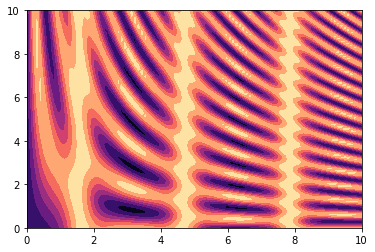

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(0,10,100)
y=np.linspace(0,10,100)

def density(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x)*np.cos(x)

X,Y=np.meshgrid(x,y)
Z=density(X,Y)


plt.contourf(X,Y,Z,cmap="magma")


plt.show()

[GoTop](#GoTop) <a id='FitWithDataInAPandasDataFrame'></a>
### Fit with Data in a pandas DataFrame

 **LMFIT 	Non-Linear Least-Squares Minimization and Curve-Fitting for Python**

Ref: https://lmfit.github.io/lmfit-py/examples/example_use_pandas.html

Simple example demonstrating how to read in the data using pandas and supply the elements of the DataFrame from lmfit.

Initially I got **ModuleNotFoundError: No module named 'lmfit'** when I executed the following cell. 

So, I used **pip3 install lmfit** in a terminal to install the module. Then there was no such error. It didn't say/produce anything yet though.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

from lmfit.models import LorentzianModel


read the data into a pandas DataFrame, and use the ‘x’ and ‘y’ columns:

kp: Initially, the following code also gave me error because it was using a datafile peak.csv that I didn't have already. So, I got it from https://github.com/lmfit/lmfit-py/blob/master/examples/peak.csv

In [14]:
dframe = pd.read_csv('data/peak.csv')

model = LorentzianModel()
params = model.guess(dframe['y'], x=dframe['x'])

result = model.fit(dframe['y'], params, x=dframe['x'])


/usr/local/lib/python3.7/site-packages/lmfit/models.py:34: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return np.abs(arr-val).argmin()


and gives the plot and fitting results below:

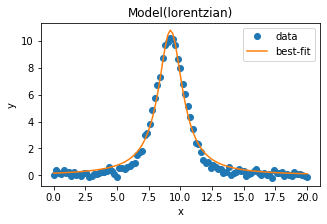

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 13.0737250
    reduced chi-square = 0.13340536
    Akaike info crit   = -200.496119
    Bayesian info crit = -192.650757
[[Variables]]
    amplitude:  39.1530829 +/- 0.62389698 (1.59%) (init = 50.7825)
    center:     9.22379520 +/- 0.01835869 (0.20%) (init = 9.3)
    sigma:      1.15503893 +/- 0.02603688 (2.25%) (init = 1.3)
    fwhm:       2.31007785 +/- 0.05207377 (2.25%) == '2.0000000*sigma'
    height:     10.7899514 +/- 0.17160472 (1.59%) == '0.3183099*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.709


In [15]:
result.plot_fit()
plt.show()

print(result.fit_report())

In [21]:
from numpy import loadtxt

from lmfit.models import GaussianModel

data = loadtxt('data/test_peak.dat')
#data = loadtxt('data/peak.csv')
x = data[:, 0]
y = data[:, 1]

mod = GaussianModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 401
    # variables        = 3
    chi-square         = 29.9943157
    reduced chi-square = 0.07536260
    Akaike info crit   = -1033.77437
    Bayesian info crit = -1021.79248
[[Variables]]
    amplitude:  30.3135620 +/- 0.15712686 (0.52%) (init = 43.62238)
    center:     9.24277047 +/- 0.00737496 (0.08%) (init = 9.25)
    sigma:      1.23218359 +/- 0.00737496 (0.60%) (init = 1.35)
    fwhm:       2.90157056 +/- 0.01736670 (0.60%) == '2.3548200*sigma'
    height:     9.81457817 +/- 0.05087283 (0.52%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.577


### Fitting a Normal distribution to 1D data

Ref: https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

A4:

You can use matplotlib to plot the histogram and the PDF (as in the link in @MrE's answer). For fitting and for computing the PDF, you can use scipy.stats.norm, as follows.

In [26]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

<Figure size 640x480 with 1 Axes>

Ref: https://stackoverflow.com/questions/27115531/python-visualize-a-normal-curve-on-datas-histogram

I wouldn't reinvent the wheel by defining the equation for Gaussian. Stand on the shoulders of the scipy package:

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


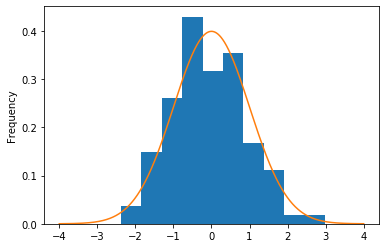

In [27]:
from scipy.stats import norm  
df = pd.DataFrame({'A': np.random.normal(size=100)})

df.A.plot(kind='hist', normed=True)

range = np.arange(-4, 4, 0.001)
plt.plot(range, norm.pdf(range,0,1))

#pdf == Probability density function at x of the given RV.
# Ref: https://kite.com/python/docs/scipy.stats.norm.pdf 

### Other references for fitting:

* https://scipy-cookbook.readthedocs.io/items/FittingData.html
* https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
* https://stackoverflow.com/questions/44480137/how-can-i-fit-a-gaussian-curve-in-python/44480190 


### Q: How can I fit a gaussian curve in python?
https://stackoverflow.com/questions/44480137/how-can-i-fit-a-gaussian-curve-in-python/44480190 

### A1
You can use fit from scipy.stats.norm as follows:
```py
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = np.random.normal(loc=5.0, scale=2.0, size=1000)
mean,std=norm.fit(data)
```
norm.fit tries to fit the parameters of a normal distribution based on the data. And indeed in the example above mean is approximately 2 and std is approximately 5.

In order to plot it, you can do:
```py
plt.hist(data, bins=30, normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()
```

In [28]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = np.random.normal(loc=5.0, scale=2.0, size=1000)
mean,std=norm.fit(data)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


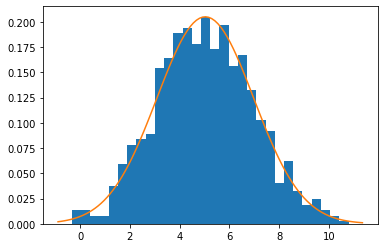

In [29]:
plt.hist(data, bins=30, normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()

### A2:

There are many ways to fit a gaussian function to a data set. I often use astropy when fitting data, that's why I wanted to add this as additional answer.

I use some data set that should simulate a gaussian with some noise:

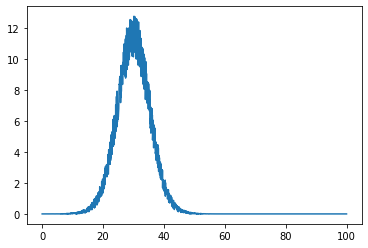

In [30]:
import numpy as np
from astropy import modeling #pip3 install astropy (if not installed already)

m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
x = np.linspace(0, 100, 2000)
data = m(x)
data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
data -= data.min()
plt.plot(x, data)

Then fitting it is actually quite simple, you specify a model that you want to fit to the data and a fitter:

In [31]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, data)

And plotted:

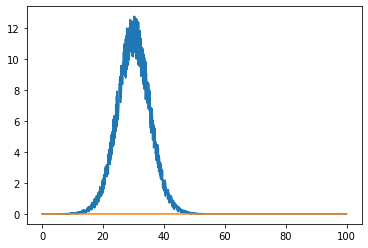

In [32]:
plt.plot(x, data)
plt.plot(x, fitted_model(x))

However you can also use just Scipy but you have to define the function yourself:

In [33]:
from scipy import optimize

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

popt, _ = optimize.curve_fit(gaussian, x, data)

This returns the optimal arguments for the fit and you can plot it like this:

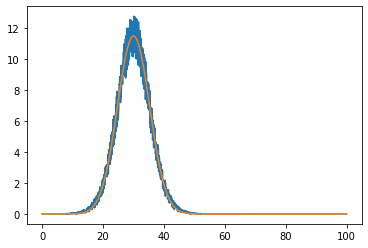

In [34]:
plt.plot(x, data)
plt.plot(x, gaussian(x, *popt))

[GoTop](#GoTop) <a id='groupbyMethod'></a>
### Pandas dataframe.groupby()

Ref: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

Pandas **dataframe.groupby()** function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

    Syntax: DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)

    Parameters :
    by : mapping, function, str, or iterable
    axis : int, default 0
    level : If the axis is a MultiIndex (hierarchical), group by a particular level or levels
    as_index : For aggregated output, return object with group labels as the index. Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output
    sort : Sort group keys. Get better performance by turning this off. Note this does not influence the order of observations within each group. groupby preserves the order of rows within each group.
    group_keys : When calling apply, add group keys to index to identify pieces
    squeeze : Reduce the dimensionality of the return type if possible, otherwise return a consistent type

    Returns : GroupBy object
    
**Example `#1`:** Use groupby() function to group the data based on the “Team”.

In [2]:
# importing pandas as pd 
import pandas as pd 
  
# Creating the dataframe  
df = pd.read_csv("data/nba.csv") 
display(df.head())
#df.first() #doesn't work (not done 'groupby' yet)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [3]:
# applying groupby() function to 
# group the data on team value. 
gk = df.groupby('Team') 
  
# Let's print the first entries 
# in all the groups formed. 
gk.first() 


,Name,Number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,Kent Bazemore,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0
Boston Celtics,Avery Bradley,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
Brooklyn Nets,Bojan Bogdanovic,44.0,SG,27.0,6-8,216.0,Oklahoma State,3425510.0
Charlotte Hornets,Nicolas Batum,5.0,SG,27.0,6-8,200.0,Virginia Commonwealth,13125306.0
Chicago Bulls,Cameron Bairstow,41.0,PF,25.0,6-9,250.0,New Mexico,845059.0
Cleveland Cavaliers,Matthew Dellavedova,8.0,PG,25.0,6-4,198.0,Saint Mary's,1147276.0
Dallas Mavericks,Justin Anderson,1.0,SG,22.0,6-6,228.0,Virginia,1449000.0
Denver Nuggets,Darrell Arthur,0.0,PF,28.0,6-9,235.0,Kansas,2814000.0
Detroit Pistons,Joel Anthony,50.0,C,33.0,6-9,245.0,UNLV,2500000.0


In [37]:
gk.last()

,Name,Number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,Jeff Teague,0.0,PG,27.0,6-2,186.0,Wake Forest,8000000.0
Boston Celtics,Tyler Zeller,44.0,C,26.0,7-0,253.0,North Carolina,2616975.0
Brooklyn Nets,Thaddeus Young,30.0,PF,27.0,6-8,221.0,Georgia Tech,11235955.0
Charlotte Hornets,Cody Zeller,40.0,C,23.0,7-0,240.0,Indiana,4204200.0
Chicago Bulls,Tony Snell,20.0,SF,24.0,6-7,200.0,New Mexico,1535880.0
Cleveland Cavaliers,Mo Williams,52.0,PG,33.0,6-1,198.0,Alabama,2100000.0
Dallas Mavericks,Deron Williams,8.0,PG,31.0,6-3,200.0,Illinois,5378974.0
Denver Nuggets,Axel Toupane,6.0,SG,23.0,6-7,210.0,St. John's,258489.0
Detroit Pistons,Anthony Tolliver,43.0,PF,31.0,6-8,240.0,Creighton,3000000.0


Let’s print the value contained any one of group. For that use the name of the team. We use the function get_group() to find the entries contained in any of the groups.

In [38]:
# Finding the values contained in the "Boston Celtics" group 
gk.get_group('Boston Celtics') 


,Name,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


**Example `#2`:** Use groupby() function to form groups based on more than one category (i.e. Use more than one column to perform the splitting).

In [4]:
# importing pandas as pd 
import pandas as pd 
  
# Creating the dataframe  
#df = pd.read_csv("data/nba.csv") 
  
# First grouping based on "Team" 
# Within each team we are grouping based on "Position" 
gkk = df.groupby(['Team', 'Position']) 
  
# Print the first value in each group 
gkk.first() 

Name  Number   Age Height  Weight  \
Team               Position                                                  
Atlanta Hawks      C               Al Horford    15.0  30.0   6-10   245.0   
                   PF          Kris Humphries    43.0  31.0    6-9   235.0   
                   PG         Dennis Schroder    17.0  22.0    6-1   172.0   
                   SF           Kent Bazemore    24.0  26.0    6-5   201.0   
                   SG        Tim Hardaway Jr.    10.0  24.0    6-6   205.0   
...                                       ...     ...   ...    ...     ...   
Washington Wizards C            Marcin Gortat    13.0  32.0   6-11   240.0   
                   PF             Drew Gooden    90.0  34.0   6-10   250.0   
                   PG          Ramon Sessions     7.0  30.0    6-3   190.0   
                   SF            Jared Dudley     1.0  30.0    6-7   225.0   
                   SG           Alan Anderson     6.0  33.0    6-6   220.0   

                                          College      Salary  
Team               Position                                    
Atlanta Hawks      C                      Florida  12000000.0  
                   PF                   Minnesota   1000000.0  
                   PG                 Wake Forest   1763400.0  
                   SF                Old Dominion   2000000.0  
                   SG                    Michigan   1304520.0  
...                                           ...         ...  
Washington Wizards C         North Carolina State  11217391.0  
                   PF                      Kansas   3300000.0  
                   PG                      Nevada   2170465.0  
                   SF              Boston College   4375000.0  
                   SG              Michigan State   4000000.0  

[149 rows x 7 columns]

In [5]:
gkk.count()

Name  Number  Age  Height  Weight  College  \
Team               Position                                               
Atlanta Hawks      C            3       3    3       3       3        1   
                   PF           4       4    4       4       4        4   
                   PG           2       2    2       2       2        1   
                   SF           2       2    2       2       2        1   
                   SG           4       4    4       4       4        4   
...                           ...     ...  ...     ...     ...      ...   
Washington Wizards C            3       3    3       3       3        1   
                   PF           2       2    2       2       2        2   
                   PG           2       2    2       2       2        2   
                   SF           4       4    4       4       4        4   
                   SG           4       4    4       4       4        4   

                             Salary  
Team               Position          
Atlanta Hawks      C              3  
                   PF             4  
                   PG             2  
                   SF             2  
                   SG             4  
...                             ...  
Washington Wizards C              3  
                   PF             2  
                   PG             2  
                   SF             4  
                   SG             4  

[149 rows x 7 columns]

In [ ]:
gkk.count().loc[]

groupby() is a very powerful function with a lot of variations. It makes the task of splitting the dataframe over some criteria really easy and efficient.

In [46]:
# Finding the values contained in the "Boston Celtics" group 
#gkk.get_group(['Boston Celtics', 'PF']) #must supply a tuple to get_group with multiple grouping keys


### Group by range of values (in a column)
Ref: https://intellipaat.com/community/20475/pandas-groupby-range-of-values, https://pbpython.com/pandas-qcut-cut.html, https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut, https://stackoverflow.com/questions/45273731/binning-column-with-python-pandas, https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut, https://www.bitdegree.org/learn/pandas-groupby

Q: Is there an easy method in pandas to invoke groupby on a range of values increments? For instance given the example below can I bin and group column B with a 0.155 increment so that for example, the first couple of groups in column B are divided into ranges between '0 - 0.155, 0.155 - 0.31 ...'

In [65]:
import numpy as np
import pandas as pd
df=pd.DataFrame({'A':np.random.random(20),'B':np.random.random(20)})
df.head()

,A,B
0,0.919758,0.378311
1,0.618034,0.847023
2,0.886187,0.899278
3,0.770507,0.768548
4,0.748026,0.077006


Alternatively I could first categorize the data by those increments into a new column and subsequently use groupby to determine any relevant statistics that may be applicable in column A?

#### A1: 
You might be interested in pd.cut that segment and sort data values into bins:

In [70]:
dgbs = df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()
dgbs

,A,B
B,,
"(0.0, 0.155]",1.740602,0.090211
"(0.155, 0.31]",2.108441,0.753152
"(0.31, 0.465]",1.239078,0.742553
"(0.465, 0.62]",0.800424,0.972583
"(0.62, 0.775]",2.170652,3.005337
"(0.775, 0.93]",3.289736,4.335152
"(0.93, 1.085]",0.270850,1.943578


In [80]:
#dgb = df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155)))
#dgb.head()

In [81]:
#df.head()
df

,A,B
0,0.919758,0.378311
1,0.618034,0.847023
2,0.886187,0.899278
3,0.770507,0.768548
4,0.748026,0.077006
5,0.173583,0.840066
6,0.245784,0.987865
7,0.573358,0.487606
8,0.996589,0.212058
9,0.227354,0.252704


#### A2:
Try this:

(kp: I used this ref for sorting method https://www.geeksforgeeks.org/sort-rows-or-columns-in-pandas-dataframe-based-on-values/)

In [64]:
#df = df.sort('B') #AttributeError: 'DataFrame' object has no attribute 'sort'
df = df.sort_values(by = 'B') 
bins =  np.arange(0,1.0,0.155)
ind = np.digitize(df['B'],bins)

#print(df.groupby(ind).head())
df.groupby(ind)
df

,A,B
18,0.687534,0.090892
5,0.095837,0.101515
13,0.316886,0.152765
15,0.414091,0.203568
16,0.324745,0.230061
12,0.572375,0.277628
4,0.452910,0.300675
14,0.986382,0.318248
10,0.802651,0.451090
3,0.601554,0.527145


Of course you can use any function on the groups not just head.

### Difference between qcut and cut
Ref: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut, 

Question:

"Continuous values can be discretized using the cut (bins based on values) and qcut (bins based on sample quantiles) functions"

In [47]:
factors = np.random.randn(30)
display(factors)
print(type(factors))

array([ 0.06822893,  2.48860909, -0.91867193, -0.82555355,  0.89959272,
        1.39479186,  1.40067835,  1.09261825,  0.27849936,  0.00885485,
       -0.07157899,  1.33524781, -0.02845063, -0.36037755,  0.53892914,
       -0.81593358, -0.41300277,  0.38391822,  1.57590153, -1.02563049,
        0.70932147, -1.07375001,  0.53252604,  0.97543013,  0.50666344,
        1.15491368,  0.06002107, -0.34035914,  0.33477097, -1.27673936])

<class 'numpy.ndarray'>


In [48]:
pd.cut(factors, 5)

[(-0.524, 0.229], (1.736, 2.489], (-1.281, -0.524], (-1.281, -0.524], (0.229, 0.982], ..., (0.982, 1.736], (-0.524, 0.229], (-0.524, 0.229], (0.229, 0.982], (-1.281, -0.524]]
Length: 30
Categories (5, interval[float64]): [(-1.281, -0.524] < (-0.524, 0.229] < (0.229, 0.982] < (0.982, 1.736] < (1.736, 2.489]]

In [49]:
pd.qcut(factors, 5)

[(0.0396, 0.517], (1.105, 2.489], (-1.2779999999999998, -0.494], (-1.2779999999999998, -0.494], (0.517, 1.105], ..., (1.105, 2.489], (0.0396, 0.517], (-0.494, 0.0396], (0.0396, 0.517], (-1.2779999999999998, -0.494]]
Length: 30
Categories (5, interval[float64]): [(-1.2779999999999998, -0.494] < (-0.494, 0.0396] < (0.0396, 0.517] < (0.517, 1.105] < (1.105, 2.489]]

#### Answer 1:


To begin, note that quantiles is just the most general term for things like percentiles, quartiles, and medians. You specified five bins in your example, so you are asking qcut for quintiles.

So, when you ask for quintiles with qcut, the bins will be chosen so that you have the same number of records in each bin. You have 30 records, so should have 6 in each bin (your output should look like this, although the breakpoints will differ due to the random draw):

    pd.qcut(factors, 5).value_counts()

    [-2.578, -0.829]    6
    (-0.829, -0.36]     6
    (-0.36, 0.366]      6
    (0.366, 0.868]      6
    (0.868, 2.617]      6

Conversely, for cut you will see something more uneven:

    pd.cut(factors, 5).value_counts()

    (-2.583, -1.539]    5
    (-1.539, -0.5]      5
    (-0.5, 0.539]       9
    (0.539, 1.578]      9
    (1.578, 2.617]      2

That's because cut will choose the bins to be evenly spaced according to the values themselves and not the frequency of those values. Hence, because you drew from a random normal, you'll see higher frequencies in the inner bins and fewer in the outer. This is essentially going to be a tabular form of a histogram (which you would expect to be fairly bell shaped with 30 records).

* Great answer for what it is. Could you speak to why you would choose one over the other? – James Hulse Feb 26 '18 at 9:55
* @JamesHulse that's a fair question but I don't have a general answer. it just depends on whether you are looking for an absolute measure vs a relative (quantile) measure more than anything else. Consider height, for example: you might be interested in relative height (over 6 ft tall) and use cut or you might care more about the tallest 5% and use qcut – JohnE Feb 26 '18 at 13:26

#### Answer 2:
* cut command creates equispaced bins but frequency of samples is unequal in each bin
* qcut command creates unequal size bins but frequency of samples is equal in each bin.

So qcut ensures a more even distribution of the values in each bin even if they cluster in the sample space. This means you are less likely to have a bin full of data with very close values and another bin with 0 values. In general, it's better sampling.

#### Answer 3:


Pd.qcut distribute elements of an array on making division on the basis of ((no.of elements in array)/(no. of bins - 1)), then divide this much no. of elements serially in each bins.

Pd.cut distribute elements of an array on making division on the basis of ((first +last element)/(no. of bins-1)) and then distribute element according to the range of values in which they fall.


### How to Use the Pandas Groupby for Grouping Data and Applying Functions
Ref: https://www.bitdegree.org/learn/pandas-groupby

Pandas groupby is a function in the Pandas library that groups data according to different sets of variables. In this case, splitting refers to the process of grouping data according to specified conditions. Applying refers to the function that you can use on these groups. Combining means that you form results in a data structure.

In [50]:
import pandas as pd
import numpy as np
df = pd.DataFrame( {     
"Employee" : ["Susan", "Bart", "Emily", "Charles", "David", "Charles", "Julia", "Bart"] ,           
"City" : ["London", "London", "Philadelphia", "London", "London", "Philadelphia", "London", "Philadelphia"] ,
"Age" : [20, 40, 18, 24, 37, 40, 44, 20 ],
"Hours" : [24, 40, 50, 36, 54, 44, 41, 35]} ) 
df

,Employee,City,Age,Hours
0,Susan,London,20,24
1,Bart,London,40,40
2,Emily,Philadelphia,18,50
3,Charles,London,24,36
4,David,London,37,54
5,Charles,Philadelphia,40,44
6,Julia,London,44,41
7,Bart,Philadelphia,20,35
